## Number of fixed points on the slow manifolds

Import packages:

In [8]:
import numpy as np
from numpy.polynomial import Polynomial as pol
from matplotlib import pyplot as plt
import matplotlib as mpl
import copy
import itertools
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy.optimize import minimize

Import own modules:

In [9]:
import import_ipynb
from COSMETICS import *
from SETUP import f0, IinTprep, IinT, TSslow, f

Some preliminaries:

In [10]:
D = 0.86
B = 0.45
R0 = -0.1

cmin = 0.001
cmax = 0.5
Rmax = 0.5
Rmin = -0.8

i1 = np.arccosh(np.sqrt(D/(B-R0)))
i2 = -np.arccosh(np.sqrt(D/B))
lpl = D*np.tanh(i1) + (R0-B)*i1
lmin = D*np.tanh(i2) - B*i2

T_sn = 1.8968299744885446
e1_sn = 2.549292519519159

e1 = 3
e2 = 1
e3 = 0.3
k = 0.151

I_sn = (e1-e1_sn)/k
lsn = D*np.tanh(I_sn) + (R0-B)*I_sn

T_off_off = f(3,1,0.3)[2][1] # = T coord of ice-free oceanic off-state equilibrium
T_off_on = f(3,1,0.3)[1][1] # = T coord of ice-free oceanic on-state equilibrium
T_off_sa = f(3,1,0.3)[0][1] # = T coord of ice-free oceanic saddle

T_on_off = max(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic off-state equilibrium
T_on_on = min(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic on-state equilibrium

c_list = np.arange(cmin, cmax, 0.001)

R_on_off = [-cval*T_on_off - lpl for cval in c_list]
R_on_on = [-cval*T_on_on - lpl for cval in c_list]
R_sn = [-cval*T_sn - lsn for cval in c_list]
R_off_off = [-cval*T_off_off-lmin for cval in c_list]
R_off_on = [-cval*T_off_on-lmin for cval in c_list]

In [11]:
# Color codes for plots

col0 = 'black'
col1 = 'blue'
col2 = 'red'
col3 = 'green'
col4 = 'orange'

## Fig 2.2(a): Fixed points on $M_0^-$

We have the expression $T_-(R) = -1/c * (\lambda_- + R)$. Hence the fixed point with $T$-coordinate $T_{off}$ vanishes/emerges when $T_{off} = T_-(R)$, i.e., when $R = -c T_{off} - \lambda_-$, and similarly for $T_{on}$ and $T_{sa}$.

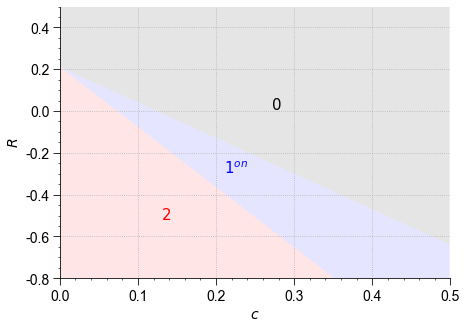

In [12]:
plt.figure(figsize=(7,5))

plt.plot(c_list, R_off_off, lw=0)
plt.plot(c_list, R_off_on, lw=0)

plt.fill_between(c_list, R_off_off, Rmin, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_off_on, alpha=0.1, color=col1, edgecolor='None')
plt.fill_between(c_list, R_off_on, Rmax, alpha=0.1, color=col0, edgecolor='None')

plt.text(0.13, -0.52, '$2$', weight='bold', size='15', color=col2)
plt.text(0.21, -0.3, '$1^{on}$', weight='bold', size='15', color=col1)
plt.text(0.27, 0.01, '$0$', weight='bold', size='15', color=col0)

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')
plt.show()

The next figure also includes the saddle, i.e. shows the total amount of equilibria (stable or not) on $M_0^-$, as a function of $R$ and $c$.

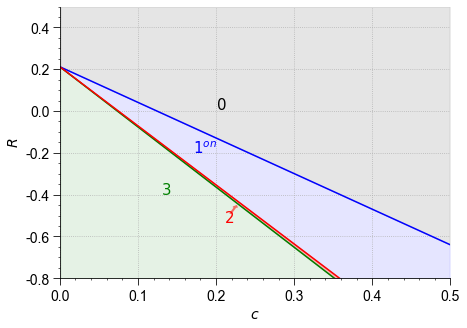

In [13]:
R_off_off = [-cval*T_off_off-lmin for cval in c_list]
R_off_on = [-cval*T_off_on-lmin for cval in c_list]
R_off_sa = [-cval*T_off_sa-lmin for cval in c_list]

plt.figure(figsize=(7,5))

plt.plot(c_list, R_off_off, label='off', color=col3)
plt.plot(c_list, R_off_on, label='on', color=col1)
plt.plot(c_list, R_off_sa, label='sa', color=col2)

plt.fill_between(c_list, R_off_off, Rmin, alpha=0.1, color=col3)
plt.fill_between(c_list, R_off_off, R_off_sa, alpha=0.3, color=col2)
plt.fill_between(c_list, R_off_sa, R_off_on, alpha=0.1, color=col1)
plt.fill_between(c_list, R_off_on, Rmax, alpha=0.1, color=col0)

plt.text(0.13, -0.4, '$3$', weight='bold', size='15', color=col3)
plt.text(0.21, -0.53, '$2$', weight='bold', size='15', color=col2)
plt.text(0.17, -0.2, '$1^{on}$', weight='bold', size='15', color=col1)
plt.text(0.2, 0.01, '$0$', weight='bold', size='15', color=col0)
plt.arrow(0.2185, -0.49, 0.006, 0.03, width = 0.002, color=col2, alpha=0.4)

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')
plt.show()

## Fig 2.2(b): Stable fixed points on $M_0^+$

Here, we determine the stable fixed points on the manifold $M_0^+$. 

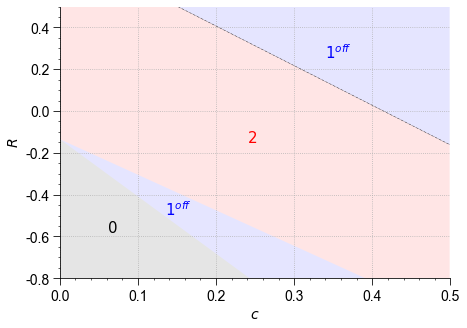

In [14]:
plt.figure(figsize=(7, 5))

plt.plot(c_list, R_on_on, lw=0)
plt.plot(c_list, R_on_off, lw=0)
plt.plot(c_list, R_sn, lw=0.4, ls='dashdot', color='black')

plt.fill_between(c_list, Rmin, R_on_off, alpha=0.1, color=col0, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_on_on, alpha=0.1, color=col1, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_sn, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_sn, Rmax, alpha=0.1, color=col1, edgecolor='None')

plt.text(0.34, 0.25, '$1^{off}$', weight='bold', size='15', color=col1)
plt.text(0.24, -0.15, '$2$', weight='bold', size='15', color=col2)
plt.text(0.135, -0.5, '$1^{off}$', weight='bold', size='15', color=col1)
plt.text(0.06, -0.58, '$0$', weight='bold', size='15', color=col0)

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')
plt.show()

## Combined (two figures)

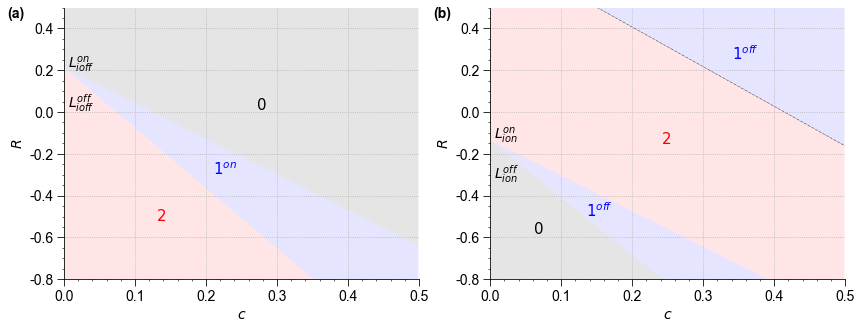

In [15]:
plt.rcParams['figure.constrained_layout.use'] = False

plt.subplots(figsize=(14, 5))

ax1 = plt.subplot(1,2,1)

plt.plot(c_list, R_off_off, lw=0)
plt.plot(c_list, R_off_on, lw=0)

plt.fill_between(c_list, R_off_off, Rmin, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_off_on, alpha=0.1, color=col1, edgecolor='None')
plt.fill_between(c_list, R_off_on, Rmax, alpha=0.1, color=col0, edgecolor='None')

plt.text(0.13, -0.52, '$2$', weight='bold', size='15', color=col2)
plt.text(0.21, -0.3, '$1^{on}$', weight='bold', size='15', color=col1)
plt.text(0.27, 0.01, '$0$', weight='bold', size='15', color=col0)

plt.text(-0.08, Rmax-0.05, '(a)', weight='bold')

plt.text(0.005, 0.21, '$L_{ioff}^{on}$')
plt.text(0.005, 0.02, '$L_{ioff}^{off}$')

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')


ax2 = plt.subplot(1, 2, 2)
plt.plot(c_list, R_on_on, lw=0)
plt.plot(c_list, R_on_off, lw=0)
plt.plot(c_list, R_sn, lw=0.4, ls='dashdot', color='black')

plt.fill_between(c_list, Rmin, R_on_off, alpha=0.1, color=col0, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_on_on, alpha=0.1, color=col1, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_sn, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_sn, Rmax, alpha=0.1, color=col1, edgecolor='None')

plt.text(0.34, 0.25, '$1^{off}$', weight='bold', size='15', color=col1)
plt.text(0.24, -0.15, '$2$', weight='bold', size='15', color=col2)
plt.text(0.135, -0.5, '$1^{off}$', weight='bold', size='15', color=col1)
plt.text(0.06, -0.58, '$0$', weight='bold', size='15', color=col0)

plt.text(-0.08, Rmax-0.05, '(b)', weight='bold')

plt.text(0.005, -0.13, '$L_{ion}^{on}$')
plt.text(0.005, -0.32, '$L_{ion}^{off}$')

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')
plt.show()

## Combined (one figure)

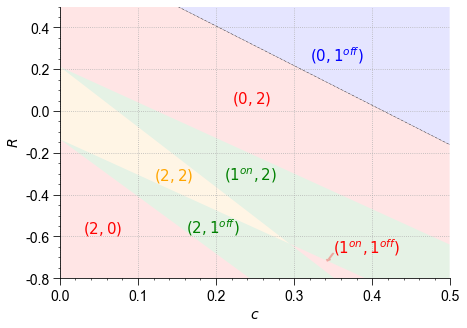

In [16]:
plt.figure(figsize=(7, 5))

plt.plot(c_list, R_off_on, lw=0)
plt.plot(c_list, R_off_off, lw=0)
plt.plot(c_list, R_on_on, lw=0)
plt.plot(c_list, R_on_off, lw=0)
plt.plot(c_list, R_sn, lw=0.4, ls='dashdot', color='black')

bool_list = np.array([1 if R_on_on[i] < R_off_off[i] else 0 for i in range(len(c_list))])
bool_list_neg = np.array([0 if R_on_on[i] < R_off_off[i] else 1 for i in range(len(c_list))])

for i in range(len(bool_list)):
    if bool_list[i] == 0:
        bool_list[i] = 1
        break

plt.fill_between(c_list, Rmin, R_on_off, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_on_on, alpha=0.1, color=col3, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_off_off, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_off, alpha=0.1, color=col4, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_off, alpha=0.1, color=col2, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_off_on, alpha=0.1, color=col3, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_on, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_on, R_sn, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_sn, Rmax, alpha=0.1, color=col1, edgecolor='None')

plt.text(0.03, -0.58, '$(2, 0)$', weight='bold', size='15', color=col2)
plt.text(0.1612, -0.58, '$(2, 1^{off})$', weight='bold', size='15', color=col3)
plt.text(0.12, -0.33, '$(2, 2)$', weight='bold', size='15', color=col4)
plt.text(0.21, -0.33, '$(1^{on}, 2)$', weight='bold', size='15', color=col3)
plt.text(0.22, 0.04, '$(0, 2)$', weight='bold', size='15', color=col2)
plt.text(0.32, 0.24, '$(0, 1^{off})$', weight='bold', size='15', color=col1)

plt.text(0.35, -0.68, '$(1^{on}, 1^{off})$', weight='bold', size='15', color=col2)
plt.arrow(0.35, -0.68, -0.006, -0.03, width = 0.002, color=col2, alpha=0.2)

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls=':')
plt.show()

## Combined $\kappa = 0.151$ and $\kappa = 0.303$

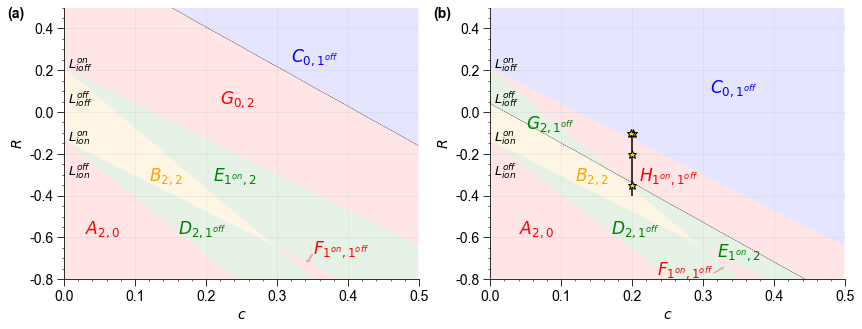

In [17]:
plt.subplots(figsize=(14, 5))
size = 17

plt.subplot(121)

k = 0.151

I_sn = (e1-e1_sn)/k
lsn = D*np.tanh(I_sn) + (R0-B)*I_sn

T_on_off = max(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic off-state equilibrium
T_on_on = min(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic on-state equilibrium

c_list = np.arange(cmin, cmax, 0.001)

R_on_off = [-cval*T_on_off - lpl for cval in c_list]
R_on_on = [-cval*T_on_on - lpl for cval in c_list]
R_sn = [-cval*T_sn - lsn for cval in c_list]
R_off_off = [-cval*T_off_off-lmin for cval in c_list]
R_off_on = [-cval*T_off_on-lmin for cval in c_list]

plt.plot(c_list, R_off_on, lw=0)
plt.plot(c_list, R_off_off, lw=0)
plt.plot(c_list, R_on_on, lw=0)
plt.plot(c_list, R_on_off, lw=0)
plt.plot(c_list, R_sn, lw=0.4, ls='--', color='black')

bool_list = np.array([1 if R_on_on[i] < R_off_off[i] else 0 for i in range(len(c_list))])
bool_list_neg = np.array([0 if R_on_on[i] < R_off_off[i] else 1 for i in range(len(c_list))])

for i in range(len(bool_list)):
    if bool_list[i] == 0:
        bool_list[i] = 1
        break

plt.fill_between(c_list, Rmin, R_on_off, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_on_on, alpha=0.1, color=col3, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_off_off, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_off, alpha=0.1, color=col4, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_off, alpha=0.1, color=col2, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_off_on, alpha=0.1, color=col3, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_off_on, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_on, R_sn, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_sn, Rmax, alpha=0.1, color=col1, edgecolor='None')

plt.text(0.03, -0.58, '$A_{2, 0}$', weight='bold', size=size, color=col2)
plt.text(0.1612, -0.58, '$D_{2, 1^{off}}$', weight='bold', size=size, color=col3)
plt.text(0.12, -0.33, '$B_{2, 2}$', weight='bold', size=size, color=col4)
plt.text(0.21, -0.33, '$E_{1^{on}, 2}$', weight='bold', size=size, color=col3)
plt.text(0.22, 0.04, '$G_{0, 2}$', weight='bold', size=size, color=col2)
plt.text(0.32, 0.24, '$C_{0, 1^{off}}$', weight='bold', size=size, color=col1)

plt.text(0.35, -0.68, '$F_{1^{on}, 1^{off}}$', weight='bold', size=size, color=col2)
plt.arrow(0.35, -0.68, -0.006, -0.03, width = 0.002, color=col2, alpha=0.2)

plt.text(0.005, 0.21, '$L_{ioff}^{on}$', size=13)
plt.text(0.005, 0.04, '$L_{ioff}^{off}$', size=13)
plt.text(0.005, -0.14, '$L_{ion}^{on}$', size=13)
plt.text(0.005, -0.3, '$L_{ion}^{off}$', size=13)

plt.text(-0.08, Rmax-0.05, '(a)', weight='bold')

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls='-', alpha=0.2)



plt.subplot(122)

k = 0.303

I_sn = (e1-e1_sn)/k
lsn = D*np.tanh(I_sn) + (R0-B)*I_sn

T_on_off = max(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic off-state equilibrium
T_on_on = min(f(e1-k*i1, e2, e3))[1] # = T coord of ice-covered oceanic on-state equilibrium

c_list = np.arange(cmin, cmax, 0.001)

R_on_off = [-cval*T_on_off - lpl for cval in c_list]
R_on_on = [-cval*T_on_on - lpl for cval in c_list]
R_sn = [-cval*T_sn - lsn for cval in c_list]
R_off_off = [-cval*T_off_off-lmin for cval in c_list]
R_off_on = [-cval*T_off_on-lmin for cval in c_list]

plt.plot(c_list, R_off_on, lw=0)
plt.plot(c_list, R_off_off, lw=0)
plt.plot(c_list, R_on_on, lw=0)
plt.plot(c_list, R_on_off, lw=0)
plt.plot(c_list, R_sn, lw=0.4, ls='--', color='black')

bool_list = np.array([1 if R_on_on[i] < R_off_off[i] else 0 for i in range(len(c_list))])
bool_list_neg = np.array([0 if R_on_on[i] < R_off_off[i] else 1 for i in range(len(c_list))])

for i in range(len(bool_list)):
    if bool_list[i] == 0:
        bool_list[i] = 1
        break
        
bool_list2 = np.array([1 if R_sn[i] < R_off_off[i] else 0 for i in range(len(c_list))])
bool_list2_neg = np.array([0 if R_sn[i] < R_off_off[i] else 1 for i in range(len(c_list))])

for i in range(len(bool_list)):
    if bool_list2[i] == 0:
        bool_list2[i] = 1
        break
        
bool_list3 = np.array([1 if R_on_on[i] < R_off_off[i] < R_sn[i] else 0 for i in range(len(c_list))])

for i in range(len(bool_list)):
    if bool_list3[i] == 0 and bool_list3[i-1] == 1:
        bool_list3[i] = 1
        break

plt.fill_between(c_list, Rmin, R_on_off, alpha=0.1, color=col2, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_on_on, alpha=0.1, color=col3, where=bool_list, edgecolor='None')
plt.fill_between(c_list, R_on_off, R_off_off, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_on_on, alpha=0.1, color=col2, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_sn, alpha=0.1, color=col4, where=bool_list2, edgecolor='None')
plt.fill_between(c_list, R_on_on, R_sn, alpha=0.1, color=col3, where=bool_list_neg, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_off_on, alpha=0.1, color=col2, where=bool_list2, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_sn, alpha=0.1, color=col3, where=bool_list2, edgecolor='None')
plt.fill_between(c_list, R_sn, R_off_off, alpha=0.1, color=col3, where=bool_list3, edgecolor='None')
plt.fill_between(c_list, R_off_off, R_on_on, alpha=0.1, color=col4, where=bool_list3, edgecolor='None')
plt.fill_between(c_list, R_off_on, R_sn, alpha=0.1, color=col2, where=bool_list2_neg, edgecolor='None')
plt.fill_between(c_list, R_off_on, Rmax, alpha=0.1, color=col1, edgecolor='None')

plt.text(0.04, -0.58, '$A_{2, 0}$', weight='bold', size=size, color=col2)
# plt.text(0.164, -0.58, '$D\!: (2, 1^{off})$', weight='bold', size='15', color=col3)
plt.text(0.17, -0.58, '$D_{2, 1^{off}}$', weight='bold', size=size, color=col3)
# plt.text(0.115, -0.33, '$B\!: (2, 2)$', weight='bold', size='15', color=col4)
plt.text(0.12, -0.33, '$B_{2, 2}$', weight='bold', size=size, color=col4)
plt.text(0.32, -0.69, '$E_{1^{on}, 2}$', weight='bold', size=size, color=col3)
plt.text(0.05, -0.08, '$G_{2, 1^{off}}$', weight='bold', size=size, color=col3)
plt.text(0.21, -0.33, '$H_{1^{on}, 1^{off}}$', weight='bold', size=size, color=col2)
plt.text(0.31, 0.09, '$C_{0, 1^{off}}$', weight='bold', size=size, color=col1)

plt.text(0.235, -0.78, '$F_{1^{on}, 1^{off}}$', weight='bold', size=size, color=col2)
plt.arrow(0.315, -0.77, 0.01, 0.02, width = 0.002, color=col2, alpha=0.2)

plt.text(0.005, 0.21, '$L_{ioff}^{on}$', size=13)
plt.text(0.005, 0.04, '$L_{ioff}^{off}$', size=13)
plt.text(0.005, -0.14, '$L_{ion}^{on}$', size=13)
plt.text(0.005, -0.3, '$L_{ion}^{off}$', size=13)

plt.text(-0.08, Rmax-0.05, '(b)', weight='bold')

plt.xlabel('$c$')
plt.ylabel('$R$')
plt.xlim(0, cmax)
plt.ylim(Rmin, Rmax)
plt.grid(ls='-', alpha=0.2)

plt.vlines(0.2, -0.4, -0.1, color='black')
plt.plot(0.2, -0.35, marker='*', markersize=9, color='gold', markeredgecolor='black')
plt.plot(0.2, -0.2, marker='*', markersize=9, color='gold', markeredgecolor='black')
plt.plot(0.201, -0.1, marker='*', markersize=9, color='gold', markeredgecolor='black')
plt.plot(0.199, -0.1, marker='*', markersize=9, color='gold', markeredgecolor='black')

plt.show()